# KNN-Practice (LIN ShengHuei)

1) DATA ANALYSIS

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [10]:
iris = pd.read_csv("C:\\Users\\User\\Downloads\\iris_dataset.txt")
iris.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [19]:
iris.iloc[:,4]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4], iris.iloc[:,4], train_size = 0.8, random_state = 42, stratify = iris.iloc[:,4])

In [4]:
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [5]:
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [6]:
np.unique(iris["target"].values, return_counts = True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [16]:
data = iris.loc[X_train.index]

NameError: name 'X_train' is not defined

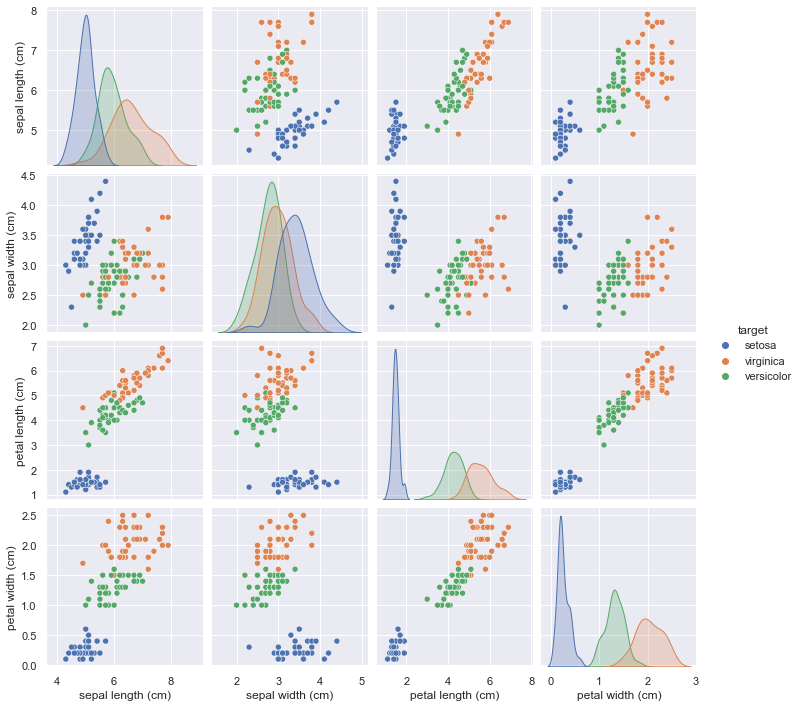

In [7]:
sns.pairplot(data = iris.loc[X_train.index], hue = "target",)
plt.show()

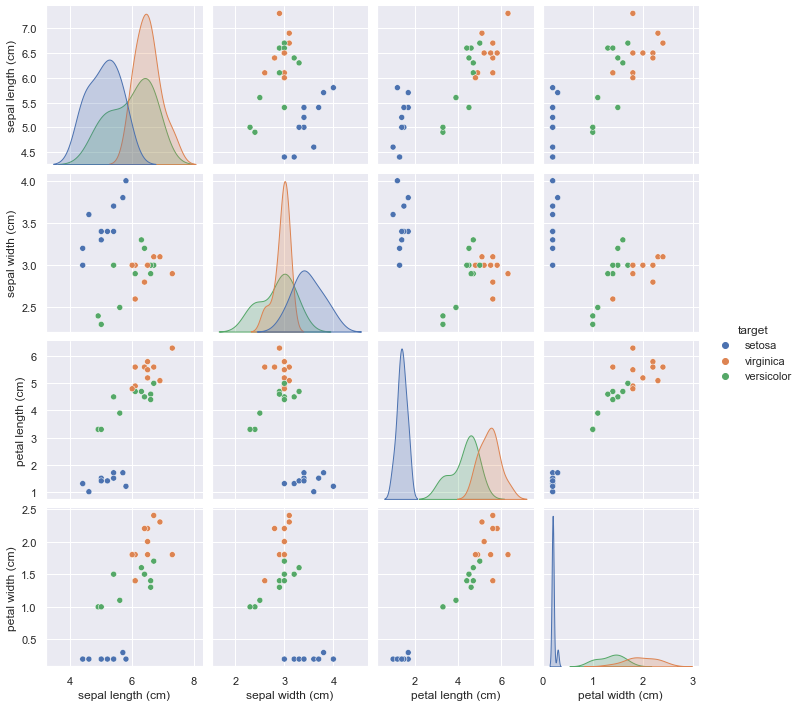

In [8]:
sns.pairplot(data = iris.loc[X_test.index], hue = "target")
plt.show()

2) Nearest neighbor algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

print(neigh.predict(X_test))

['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa']


In [10]:
neigh.score(X_test, y_test)

0.9666666666666667

3) Analysis of the functioning of the algorithm : 50% for the learning base and 50% for the test base

In [11]:
X_data_app, X_data_tst, y_data_app, y_data_tst = train_test_split(iris.iloc[:,0:4], iris.iloc[:,4],random_state = 42, train_size = 0.5)

a)Using the whole test base, write a script for :
- Create a learning base data_app_bis, whose size varies from 1% to 100% of data_app. 
- Use this database to classify the complete test database data_tst. Store recognition rate in 
a vector.

In [12]:
accuracy_scores = []
train_sizes = []

for i in np.arange(0.02,0.99,0.01):
    X_data_app_bis, X_garbage, y_data_app_bis, y_garbage = train_test_split(X_data_app, y_data_app, random_state = 42, train_size = i)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_data_app_bis, y_data_app_bis)
    
    accuracy = knn.score(X_data_tst, y_data_tst)
    accuracy_scores.append(accuracy)
    
    train_sizes.append(i)

Text(0.5, 1.0, 'Evolution of accuracy according to train set sizes')

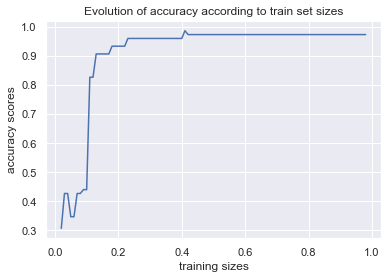

In [13]:
plt.plot(train_sizes, accuracy_scores)
plt.xlabel("training sizes")
plt.ylabel("accuracy scores")
plt.title("Evolution of accuracy according to train set sizes")

b)Using the entire learning base, write a script for :
- Create a test base data_tst_bis, whose size varies from 1% to 100% of data_tst. 
- Use the complete learning base data_app to classify the data_tst_bis database. Store the
recognition rate in a vector.
- Display the evolution of the recognition rate according to the number of test examples 
(plot function). 

- Explain the influence of the number of test examples on the recognition rate and the 
classification time. (bonus question)

In [14]:
accuracy_scores_2 = []
train_sizes_2 = []

for i in np.arange(0.02,0.99,0.01):
    X_data_tst_bis, X_garbage_2, y_data_tst_bis, y_garbage_2 = train_test_split(X_data_tst, y_data_tst, random_state = 42, train_size = i)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_data_tst_bis, y_data_tst_bis)
    
    accuracy_2 = knn.score(X_data_app, y_data_app)
    accuracy_scores_2.append(accuracy_2)
    
    train_sizes_2.append(i)

Text(0.5, 1.0, 'Evolution of accuracy according to train set sizes')

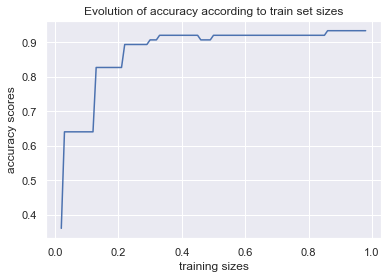

In [15]:
plt.plot(train_sizes_2, accuracy_scores_2)
plt.xlabel("training sizes")
plt.ylabel("accuracy scores")
plt.title("Evolution of accuracy according to train set sizes")

4) k-nn algorithm

In [16]:
X_data_train, X_data_test , y_data_train, y_data_test = train_test_split(iris.iloc[:,0:4], iris.iloc[:,4],random_state = 42, train_size = 0.8)

In [17]:
accuracy_scores_3 = []
n_k = []

for k in np.arange(1,120,1):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_data_train, y_data_train)
    
    accuracy_3 = knn.score(X_data_test, y_data_test)
    accuracy_scores_3.append(accuracy_3)
    
    n_k.append(k)

Text(0.5, 1.0, 'Evolution of accuracy according to the number of k')

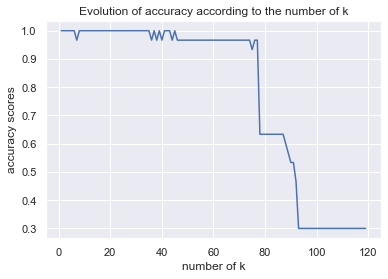

In [18]:
plt.plot(n_k, accuracy_scores_3)
plt.xlabel("number of k")
plt.ylabel("accuracy scores")
plt.title("Evolution of accuracy according to the number of k")

When the number of k increase the accuracy will decrease.

In [ ]:
b) Give the optimal value of k. Plot the boundaries for this value.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [25]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

In [26]:
iris = pd.read_csv("C:\\Users\\User\\Downloads\\iris_dataset.txt")


In [29]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

AttributeError: 'DataFrame' object has no attribute 'data'

In [22]:
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()